### This is the final iPython notebook, which includes 1) Pre-processing of data, 2) Modelling, and 3) Evaluation of Model.

In [1]:
import pandas as pd
import seaborn as sns
from pprint import pprint

In [2]:
# Read the Json data file
recipes = pd.read_json('Epicurious Recipes/full_format_recipes.json')

In [3]:
recipes.head()

,calories,categories,date,desc,directions,fat,ingredients,protein,rating,sodium,title
0,426.0,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",2006-09-01 04:00:00,None,"[1. Place the stock, lentils, celery, carrot, ...",7.0,"[4 cups low-sodium vegetable or chicken stock,...",30.0,2.500,559.0,"Lentil, Apple, and Turkey Wrap"
1,403.0,"[Food Processor, Onion, Pork, Bake, Bastille D...",2004-08-20 04:00:00,This uses the same ingredients found in boudin...,[Combine first 9 ingredients in heavy medium s...,23.0,"[1 1/2 cups whipping cream, 2 medium onions, c...",18.0,4.375,1439.0,Boudin Blanc Terrine with Red Onion Confit
2,165.0,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",2004-08-20 04:00:00,None,[In a large heavy saucepan cook diced fennel a...,7.0,"[1 fennel bulb (sometimes called anise), stalk...",6.0,3.750,165.0,Potato and Fennel Soup Hodge
3,NaN,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",2009-03-27 04:00:00,The Sicilian-style tomato sauce has tons of Me...,[Heat oil in heavy large skillet over medium-h...,NaN,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN,5.000,NaN,Mahi-Mahi in Tomato Olive Sauce
4,547.0,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",2004-08-20 04:00:00,None,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,"[1 12-ounce package frozen spinach soufflé, th...",20.0,3.125,452.0,Spinach Noodle Casserole


# EDA

In [4]:
print(recipes.dtypes) # data types
pd.options.display.float_format = "{:.3f}".format
print(recipes.describe()) # summary statistics

calories              float64
categories             object
date           datetime64[ns]
desc                   object
directions             object
fat                   float64
ingredients            object
protein               float64
rating                float64
sodium                float64
title                  object
dtype: object
          calories         fat    protein    rating       sodium
count    15976.000   15908.000  15929.000 20100.000    15974.000
mean      6307.857     346.097     99.946     3.713     6211.474
std     358585.123   20431.021   3835.617     1.343   332890.254
min          0.000       0.000      0.000     0.000        0.000
25%        198.000       7.000      3.000     3.750       80.000
50%        331.000      17.000      8.000     4.375      294.000
75%        586.000      33.000     27.000     4.375      711.000
max   30111218.000 1722763.000 236489.000     5.000 27675110.000


In [5]:
# check for missing values
for i in recipes.columns:
    print("records with missing", i, ":", sum(recipes[i].isnull()))

records with missing calories : 4154
records with missing categories : 19
records with missing date : 19
records with missing desc : 6635
records with missing directions : 19
records with missing fat : 4222
records with missing ingredients : 19
records with missing protein : 4201
records with missing rating : 30
records with missing sodium : 4156
records with missing title : 19


In [6]:
# look at the records with missing title
nullrecipes = recipes[recipes["title"].isnull()]
print(nullrecipes)

       calories categories date desc directions  fat ingredients  protein  \
1076        nan        NaN  NaT  NaN        NaN  nan         NaN      nan   
1135        nan        NaN  NaT  NaN        NaN  nan         NaN      nan   
1907        nan        NaN  NaT  NaN        NaN  nan         NaN      nan   
5146        nan        NaN  NaT  NaN        NaN  nan         NaN      nan   
5424        nan        NaN  NaT  NaN        NaN  nan         NaN      nan   
5558        nan        NaN  NaT  NaN        NaN  nan         NaN      nan   
7607        nan        NaN  NaT  NaN        NaN  nan         NaN      nan   
7768        nan        NaN  NaT  NaN        NaN  nan         NaN      nan   
7881        nan        NaN  NaT  NaN        NaN  nan         NaN      nan   
8177        nan        NaN  NaT  NaN        NaN  nan         NaN      nan   
9590        nan        NaN  NaT  NaN        NaN  nan         NaN      nan   
10085       nan        NaN  NaT  NaN        NaN  nan         NaN      nan   

In [7]:
# remove records with missing title
recipes_final = recipes[recipes["title"].notnull()]
recipes_final.reset_index(drop=True, inplace=True)

# recheck data after removing null records
print("no. of records = ", len(recipes_final))
print(recipes_final.describe()) # summary statistics
for i in recipes_final.columns:
    print("records with missing", i, ":", sum(recipes_final[i].isnull()))

no. of records =  20111
          calories         fat    protein    rating       sodium
count    15976.000   15908.000  15929.000 20100.000    15974.000
mean      6307.857     346.097     99.946     3.713     6211.474
std     358585.123   20431.021   3835.617     1.343   332890.254
min          0.000       0.000      0.000     0.000        0.000
25%        198.000       7.000      3.000     3.750       80.000
50%        331.000      17.000      8.000     4.375      294.000
75%        586.000      33.000     27.000     4.375      711.000
max   30111218.000 1722763.000 236489.000     5.000 27675110.000
records with missing calories : 4135
records with missing categories : 0
records with missing date : 0
records with missing desc : 6616
records with missing directions : 0
records with missing fat : 4203
records with missing ingredients : 0
records with missing protein : 4182
records with missing rating : 11
records with missing sodium : 4137
records with missing title : 0


In [8]:
# Remove duplicates and reset index
recipes_final = recipes_final.iloc[recipes_final.astype(str).drop_duplicates().index]
recipes_final.reset_index(drop=True, inplace=True)

print("no. of records = ", len(recipes_final))

no. of records =  18295


4.375    7373
3.750    4760
5.000    2391
0.000    1667
3.125    1356
2.500     485
1.250     145
1.875     108
Name: rating, dtype: int64


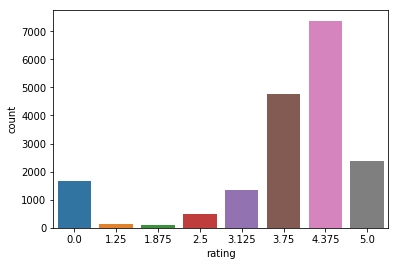

In [9]:
# rating plot
print(recipes_final.rating.value_counts())
sns.countplot(recipes_final["rating"])

# Preprocessing

In [10]:
import gensim
import nltk

data = recipes_final.ingredients.values.tolist()
print(data[:2])

[['4 cups low-sodium vegetable or chicken stock', '1 cup dried brown lentils', '1/2 cup dried French green lentils', '2 stalks celery, chopped', '1 large carrot, peeled and chopped', '1 sprig fresh thyme', '1 teaspoon kosher salt', '1 medium tomato, cored, seeded, and diced', '1 small Fuji apple, cored and diced', '1 tablespoon freshly squeezed lemon juice', '2 teaspoons extra-virgin olive oil', 'Freshly ground black pepper to taste', '3 sheets whole-wheat lavash, cut in half crosswise, or 6 (12-inch) flour tortillas', '3/4 pound turkey breast, thinly sliced', '1/2 head Bibb lettuce'], ['1 1/2 cups whipping cream', '2 medium onions, chopped', '5 teaspoons salt', '3 bay leaves', '3 whole cloves', '1 large garlic clove, crushed', '1 teaspoon pepper', '1/8 teaspoon ground nutmeg', 'Pinch of dried thyme, crumbled', '8 large shallots, minced', '1 tablespoon butter', '1 pound trimmed boneless center pork loin, sinew removed cut into 1-inch chunks, well chilled', '3 eggs', '6 tablespoon all p

In [11]:
# Tokenization
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))
print(data_words[:2])

[['cups', 'low', 'sodium', 'vegetable', 'or', 'chicken', 'stock', 'cup', 'dried', 'brown', 'lentils', 'cup', 'dried', 'french', 'green', 'lentils', 'stalks', 'celery', 'chopped', 'large', 'carrot', 'peeled', 'and', 'chopped', 'sprig', 'fresh', 'thyme', 'teaspoon', 'kosher', 'salt', 'medium', 'tomato', 'cored', 'seeded', 'and', 'diced', 'small', 'fuji', 'apple', 'cored', 'and', 'diced', 'tablespoon', 'freshly', 'squeezed', 'lemon', 'juice', 'teaspoons', 'extra', 'virgin', 'olive', 'oil', 'freshly', 'ground', 'black', 'pepper', 'to', 'taste', 'sheets', 'whole', 'wheat', 'lavash', 'cut', 'in', 'half', 'crosswise', 'or', 'inch', 'flour', 'tortillas', 'pound', 'turkey', 'breast', 'thinly', 'sliced', 'head', 'bibb', 'lettuce'], ['cups', 'whipping', 'cream', 'medium', 'onions', 'chopped', 'teaspoons', 'salt', 'bay', 'leaves', 'whole', 'cloves', 'large', 'garlic', 'clove', 'crushed', 'teaspoon', 'pepper', 'teaspoon', 'ground', 'nutmeg', 'pinch', 'of', 'dried', 'thyme', 'crumbled', 'large', 'sh

In [12]:
# lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data_lemma = [[lemmatizer.lemmatize(w) for w in doc] for doc in data_words]
print(data_lemma[:2])

[['cup', 'low', 'sodium', 'vegetable', 'or', 'chicken', 'stock', 'cup', 'dried', 'brown', 'lentil', 'cup', 'dried', 'french', 'green', 'lentil', 'stalk', 'celery', 'chopped', 'large', 'carrot', 'peeled', 'and', 'chopped', 'sprig', 'fresh', 'thyme', 'teaspoon', 'kosher', 'salt', 'medium', 'tomato', 'cored', 'seeded', 'and', 'diced', 'small', 'fuji', 'apple', 'cored', 'and', 'diced', 'tablespoon', 'freshly', 'squeezed', 'lemon', 'juice', 'teaspoon', 'extra', 'virgin', 'olive', 'oil', 'freshly', 'ground', 'black', 'pepper', 'to', 'taste', 'sheet', 'whole', 'wheat', 'lavash', 'cut', 'in', 'half', 'crosswise', 'or', 'inch', 'flour', 'tortilla', 'pound', 'turkey', 'breast', 'thinly', 'sliced', 'head', 'bibb', 'lettuce'], ['cup', 'whipping', 'cream', 'medium', 'onion', 'chopped', 'teaspoon', 'salt', 'bay', 'leaf', 'whole', 'clove', 'large', 'garlic', 'clove', 'crushed', 'teaspoon', 'pepper', 'teaspoon', 'ground', 'nutmeg', 'pinch', 'of', 'dried', 'thyme', 'crumbled', 'large', 'shallot', 'minc

In [13]:
# Removal of standard stop words
stopwords = nltk.corpus.stopwords.words('english')
data_stop_lemma = [[w for w in doc if w not in stopwords] for doc in data_lemma]
print(data_stop_lemma[:2])

[['cup', 'low', 'sodium', 'vegetable', 'chicken', 'stock', 'cup', 'dried', 'brown', 'lentil', 'cup', 'dried', 'french', 'green', 'lentil', 'stalk', 'celery', 'chopped', 'large', 'carrot', 'peeled', 'chopped', 'sprig', 'fresh', 'thyme', 'teaspoon', 'kosher', 'salt', 'medium', 'tomato', 'cored', 'seeded', 'diced', 'small', 'fuji', 'apple', 'cored', 'diced', 'tablespoon', 'freshly', 'squeezed', 'lemon', 'juice', 'teaspoon', 'extra', 'virgin', 'olive', 'oil', 'freshly', 'ground', 'black', 'pepper', 'taste', 'sheet', 'whole', 'wheat', 'lavash', 'cut', 'half', 'crosswise', 'inch', 'flour', 'tortilla', 'pound', 'turkey', 'breast', 'thinly', 'sliced', 'head', 'bibb', 'lettuce'], ['cup', 'whipping', 'cream', 'medium', 'onion', 'chopped', 'teaspoon', 'salt', 'bay', 'leaf', 'whole', 'clove', 'large', 'garlic', 'clove', 'crushed', 'teaspoon', 'pepper', 'teaspoon', 'ground', 'nutmeg', 'pinch', 'dried', 'thyme', 'crumbled', 'large', 'shallot', 'minced', 'tablespoon', 'butter', 'pound', 'trimmed', 'b

In [14]:
# To combine list of list into one single big list and print out the top words that occur most frequently
# result = sum(data_stop_lemma, [])
# fdist = nltk.FreqDist(result)
# print(fdist.most_common(200))

In [15]:
# Removal of stop words
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['cup', 'tablespoon', 'teaspoon', 'chopped', 'fresh', 'ounce', 'salt', 'large', 'pound', 'inch', 'cut',
                'ground',  'sliced', 'finely', 'peeled', 'grated', 'unsalted', 'water', 'piece', 'stick', 'plus', 
                'freshly', 'medium', 'thinly', 'whole', 'small', 'dry', 'packed', 'slice', 'coarsely', 'halved', 
                'divided', 'parsley',  'thick', 'trimmed', 'drained', 'diced', 'lb',  'lengthwise', 'taste', 'toasted', 
                'cube', 'seeded', 'low', 'frozen', 'half', 'temperature', 'room', 'chilled', 'oz', 'heavy', 'canned', 
                'crumbled', 'peel', 'chile', 'crushed', 'coarse', 'optional', 'pitted', 'preferably', 'package', 
                'garnish', 'quartered', 'crosswise', 'ice', 'strip', 'thin', 'hot', 'equipment', 'fine', 'bunch', 
                'sea', 'removed', 'light',  'special', 'dijon', 'rinsed', 'flat', 'rib', 'boneless', 'melted', 
                'head', 'pinch', 'dark', 'cored', 'fat', 'golden','paste', 'cooked', 'well', 'ripe', 'accompaniment', 
                'lightly',  'fennel', 'softened', 'available', 'mayonnaise','sugar','kosher','cold','long','minced', 
                # after checking through the topics (numbers 1-4 results)
                'nonstick', 'spray','quart', 'serving', 'xa', 'wedge', 'part', 'torn', 'bulb', 'wide', 'stemmed', 
                'shredded', 'desired', 'round', 'total', 'unpeeled', 'beaten', 'dice', 'granulated', 'two', 
                'one', 'cooled', 'kitchen', 'string', 'raw', 'unsweetened', 'sheet', 'chunk', 'thawed', 'brown', 
                'warm', 'regular', 'roasted', 'tbsp', 'patted', 'firmly', 'pan', 'additional', 'pure', 'separated', 'size', 
                # add these words to get number 5 results
                'superfine', 'frying', 'pale', 'purpose', 'split', 'tsp', 'bone', 'stem'
                # add these words to get number 6 results
                # 'purchased', 'reserved', 'diameter', 'sweet', 'roughly'
               ]

stopwords.extend(newStopWords)
data_addstop_lemma = [[w for w in doc if w not in stopwords] for doc in data_stop_lemma]
print(data_addstop_lemma[:2])

[['sodium', 'vegetable', 'chicken', 'stock', 'dried', 'lentil', 'dried', 'french', 'green', 'lentil', 'stalk', 'celery', 'carrot', 'sprig', 'thyme', 'tomato', 'fuji', 'apple', 'squeezed', 'lemon', 'juice', 'extra', 'virgin', 'olive', 'oil', 'black', 'pepper', 'wheat', 'lavash', 'flour', 'tortilla', 'turkey', 'breast', 'bibb', 'lettuce'], ['whipping', 'cream', 'onion', 'bay', 'leaf', 'clove', 'garlic', 'clove', 'pepper', 'nutmeg', 'dried', 'thyme', 'shallot', 'butter', 'center', 'pork', 'loin', 'sinew', 'egg', 'flour', 'tawny', 'port', 'dried', 'currant', 'lettuce', 'leaf', 'cracked', 'peppercorn', 'bay', 'leaf', 'french', 'bread', 'baguette', 'olive', 'oil', 'red', 'onion', 'dried', 'currant', 'red', 'wine', 'vinegar', 'chicken', 'broth', 'thyme', 'dried']]


In [16]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_addstop_lemma, min_count=5, threshold=5) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_addstop_lemma], threshold=5)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_addstop_lemma[0]]])
print(trigram_mod[bigram_mod[data_addstop_lemma[1]]])

['sodium_vegetable', 'chicken_stock', 'dried', 'lentil', 'dried', 'french_green_lentil', 'stalk_celery_carrot', 'sprig_thyme', 'tomato', 'fuji_apple', 'squeezed_lemon_juice', 'extra_virgin_olive_oil', 'black_pepper', 'wheat', 'lavash', 'flour_tortilla', 'turkey_breast', 'bibb_lettuce']
['whipping_cream', 'onion', 'bay_leaf', 'clove', 'garlic_clove', 'pepper', 'nutmeg', 'dried_thyme', 'shallot', 'butter', 'center_pork_loin', 'sinew', 'egg', 'flour', 'tawny_port', 'dried_currant', 'lettuce_leaf', 'cracked', 'peppercorn', 'bay_leaf', 'french_bread_baguette', 'olive_oil', 'red_onion', 'dried_currant', 'red_wine_vinegar', 'chicken_broth', 'thyme', 'dried']


In [17]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Form Bigrams
data_words_bigrams = make_bigrams(data_addstop_lemma)

# Form Trigrams
data_words_trigrams = make_trigrams(data_addstop_lemma)

print(data_words_trigrams[:2])

[['sodium_vegetable', 'chicken_stock', 'dried', 'lentil', 'dried', 'french_green_lentil', 'stalk_celery_carrot', 'sprig_thyme', 'tomato', 'fuji_apple', 'squeezed_lemon_juice', 'extra_virgin_olive_oil', 'black_pepper', 'wheat', 'lavash', 'flour_tortilla', 'turkey_breast', 'bibb_lettuce'], ['whipping_cream', 'onion', 'bay_leaf', 'clove', 'garlic_clove', 'pepper', 'nutmeg', 'dried_thyme', 'shallot', 'butter', 'center_pork_loin', 'sinew', 'egg', 'flour', 'tawny_port', 'dried_currant', 'lettuce_leaf', 'cracked', 'peppercorn', 'bay_leaf', 'french_bread_baguette', 'olive_oil', 'red_onion', 'dried_currant', 'red_wine_vinegar', 'chicken_broth', 'thyme', 'dried']]


# Topic Modeling

In [18]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(data_words_trigrams)

# Filter terms which occurs in less than 150 recipes & more than 60% of the articles 
id2word.filter_extremes(no_below=150, no_above=0.6)
 
print(id2word)

Dictionary(193 unique tokens: ['black_pepper', 'dried', 'extra_virgin_olive_oil', 'tomato', 'bay_leaf']...)


In [19]:
# Create Corpus
texts = data_words_trigrams
corpus = [id2word.doc2bow(text) for text in texts] # convert doc to vector
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1)]]


In [20]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8,
                                           random_state=50)

In [21]:
# Specify how many topics we want to inspect and for each topic how many top words we want to include
topics = lda_model.show_topics(8, 15) 

for i in range(0, 8):
    pprint(topics[i])

(0,
 '0.081*"vegetable_oil" + 0.075*"ginger" + 0.062*"soy_sauce" + 0.059*"pepper" '
 '+ 0.054*"garlic_clove" + 0.045*"scallion" + 0.043*"sauce" + 0.037*"green" + '
 '0.028*"honey" + 0.025*"onion" + 0.023*"dried_red" + 0.022*"mixed" + '
 '0.020*"cornstarch" + 0.020*"peanut" + 0.018*"sherry"')
(1,
 '0.103*"butter" + 0.061*"onion" + 0.052*"chicken_broth" + 0.044*"flour" + '
 '0.030*"white_wine" + 0.029*"thyme" + 0.026*"bay_leaf" + 0.024*"black_pepper" '
 '+ 0.024*"shallot" + 0.023*"dried" + 0.022*"garlic_clove" + '
 '0.020*"whipping_cream" + 0.020*"dried_thyme" + 0.020*"sage" + 0.019*"carrot"')
(2,
 '0.089*"onion" + 0.068*"cilantro" + 0.054*"green" + 0.043*"garlic_clove" + '
 '0.041*"white" + 0.041*"leaf" + 0.029*"ginger" + 0.029*"olive_oil" + '
 '0.028*"vegetable_oil" + 0.024*"lime_juice" + 0.020*"black_pepper" + '
 '0.019*"lime" + 0.017*"pepper" + 0.017*"tomato" + 0.016*"curry_powder"')
(3,
 '0.080*"lime_juice" + 0.053*"juice" + 0.052*"orange" + 0.052*"red_onion" + '
 '0.048*"orange_jui

# Model Perplexity and Coherence Score

In [22]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -4.8106286114314925


In [23]:
# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4831088206293682


# Find Optimal Number of Topics for Model

In [24]:
# Can take a long time to run. In this case we are going to  k_max=12.
from gensim.models import CoherenceModel

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(6, 13, 1):
    lda_model_x = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=50)
    coherencemodel = CoherenceModel(model=lda_model_x, texts=data_words_trigrams, dictionary=id2word, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(lda_model_x)
    coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

#Topics: 6 Score: 0.46204404055914194
#Topics: 7 Score: 0.4905948350815358
#Topics: 8 Score: 0.4831088206293682
#Topics: 9 Score: 0.4673163713433591
#Topics: 10 Score: 0.4612827331717786
#Topics: 11 Score: 0.45904482274945957
#Topics: 12 Score: 0.4596975524915268


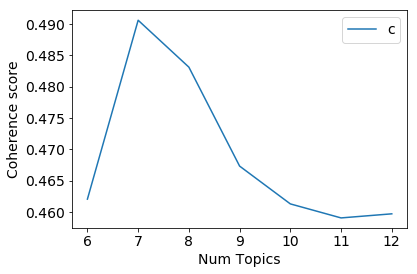

In [25]:
# Show graph
import matplotlib.pyplot as plt

limit=13; start=6; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics", fontsize=14)
plt.ylabel("Coherence score", fontsize=14)
plt.legend(("coherence_values"), loc='best', fontsize=14)
plt.tick_params(labelsize=14)

In [26]:
# optimal_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                                id2word=id2word,
#                                                num_topics=8,
#                                                random_state=50)

optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=30))

[(0,
  '0.081*"vegetable_oil" + 0.075*"ginger" + 0.062*"soy_sauce" + 0.059*"pepper" '
  '+ 0.054*"garlic_clove" + 0.045*"scallion" + 0.043*"sauce" + 0.037*"green" + '
  '0.028*"honey" + 0.025*"onion" + 0.023*"dried_red" + 0.022*"mixed" + '
  '0.020*"cornstarch" + 0.020*"peanut" + 0.018*"sherry" + '
  '0.017*"cider_vinegar" + 0.017*"sesame_seed" + 0.016*"white" + '
  '0.015*"garlic" + 0.014*"pineapple" + 0.013*"gingerroot" + '
  '0.012*"lime_juice" + 0.012*"mint" + 0.012*"white_wine" + 0.012*"raisin" + '
  '0.011*"red" + 0.011*"vinegar" + 0.010*"worcestershire_sauce" + '
  '0.010*"extra_virgin_olive_oil" + 0.009*"carrot"'),
 (1,
  '0.103*"butter" + 0.061*"onion" + 0.052*"chicken_broth" + 0.044*"flour" + '
  '0.030*"white_wine" + 0.029*"thyme" + 0.026*"bay_leaf" + '
  '0.024*"black_pepper" + 0.024*"shallot" + 0.023*"dried" + '
  '0.022*"garlic_clove" + 0.020*"whipping_cream" + 0.020*"dried_thyme" + '
  '0.020*"sage" + 0.019*"carrot" + 0.018*"pepper" + 0.018*"vegetable_oil" + '
  '0.017*"

# Find Dominant Topic for Each Sentence

In [27]:
# Find most dominant topic

import numpy as np
import pandas as pd

def format_topics_sentences(ldamodel, corpus, data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(data_words_trigrams)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, data=data_words_trigrams)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.000,0.854,"garlic_clove, extra_virgin_olive_oil, black_pe...","[sodium_vegetable, chicken_stock, dried, lenti..."
1,1,1.000,0.774,"butter, onion, chicken_broth, flour, white_win...","[whipping_cream, onion, bay_leaf, clove, garli..."
2,2,1.000,0.648,"butter, onion, chicken_broth, flour, white_win...","[sometimes_called_anise_stalk, discarded, feat..."
3,3,4.000,0.755,"garlic_clove, extra_virgin_olive_oil, black_pe...","[extra_virgin_olive_oil, onion, white_wine, an..."
4,4,5.000,0.708,"butter, egg, flour, milk, cream, vanilla_extra...","[spinach, souffle, extra, egg_noodle, sour_cre..."
5,5,4.000,0.706,"garlic_clove, extra_virgin_olive_oil, black_pe...","[basil_leaf, butter, bacon, country_style, whi..."
6,6,6.000,0.562,"lemon_juice, black_pepper, extra_virgin_olive_...","[red_skinned_potato, baby_carrot, asparagus, s..."
7,7,5.000,0.531,"butter, egg, flour, milk, cream, vanilla_extra...","[chili_powder, powdered, egg_white, see_cook_n..."
8,8,0.000,0.933,"vegetable_oil, ginger, soy_sauce, pepper, garl...","[soy_sauce_asian_sesame, oil, scallion, white,..."
9,9,6.000,0.912,"lemon_juice, black_pepper, extra_virgin_olive_...","[sprig, reduced_sodium_chicken_broth, garlic_c..."


# Find the most representative documents for each topic

In [28]:
df_topic_sents_keywords_dtl = pd.concat([df_topic_sents_keywords,recipes_final], axis=1)
df_topic_sents_keywords_dtl.head()

,Dominant_Topic,Perc_Contribution,Topic_Keywords,0,calories,categories,date,desc,directions,fat,ingredients,protein,rating,sodium,title
0,4.000,0.854,"garlic_clove, extra_virgin_olive_oil, black_pe...","[sodium_vegetable, chicken_stock, dried, lenti...",426.000,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",2006-09-01 04:00:00,None,"[1. Place the stock, lentils, celery, carrot, ...",7.000,"[4 cups low-sodium vegetable or chicken stock,...",30.000,2.500,559.000,"Lentil, Apple, and Turkey Wrap"
1,1.000,0.774,"butter, onion, chicken_broth, flour, white_win...","[whipping_cream, onion, bay_leaf, clove, garli...",403.000,"[Food Processor, Onion, Pork, Bake, Bastille D...",2004-08-20 04:00:00,This uses the same ingredients found in boudin...,[Combine first 9 ingredients in heavy medium s...,23.000,"[1 1/2 cups whipping cream, 2 medium onions, c...",18.000,4.375,1439.000,Boudin Blanc Terrine with Red Onion Confit
2,1.000,0.648,"butter, onion, chicken_broth, flour, white_win...","[sometimes_called_anise_stalk, discarded, feat...",165.000,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",2004-08-20 04:00:00,None,[In a large heavy saucepan cook diced fennel a...,7.000,"[1 fennel bulb (sometimes called anise), stalk...",6.000,3.750,165.000,Potato and Fennel Soup Hodge
3,4.000,0.755,"garlic_clove, extra_virgin_olive_oil, black_pe...","[extra_virgin_olive_oil, onion, white_wine, an...",nan,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",2009-03-27 04:00:00,The Sicilian-style tomato sauce has tons of Me...,[Heat oil in heavy large skillet over medium-h...,nan,"[2 tablespoons extra-virgin olive oil, 1 cup c...",nan,5.000,nan,Mahi-Mahi in Tomato Olive Sauce
4,5.000,0.708,"butter, egg, flour, milk, cream, vanilla_extra...","[spinach, souffle, extra, egg_noodle, sour_cre...",547.000,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",2004-08-20 04:00:00,None,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.000,"[1 12-ounce package frozen spinach soufflé, th...",20.000,3.125,452.000,Spinach Noodle Casserole


In [29]:
# Group top 15 sentences under each topic
sent_topics_sorteddf = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords_dtl.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, grp.sort_values(['Perc_Contribution'], ascending=[0]).head(15)], axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text",
                                "calories","categories","date","desc","directions","fat","ingredients","protein","rating","sodium","title"]

# Show
sent_topics_sorteddf

,Topic_Num,Topic_Perc_Contrib,Keywords,Text,calories,categories,date,desc,directions,fat,ingredients,protein,rating,sodium,title
0,0.000,0.954,"vegetable_oil, ginger, soy_sauce, pepper, garl...","[soy_sauce, chinese_rice_wine, sherry, cornsta...",259.000,"[Chicken, Stir-Fry, Dinner, Soy Sauce, Chile P...",2013-07-02 04:00:00.000,This highly addictive stir-fried chicken conti...,"[1. Marinate the chicken: In a medium bowl, st...",11.000,"[1 tablespoon soy sauce, 2 teaspoons Chinese r...",30.000,5.000,371.000,Kung Pao Chicken
1,0.000,0.945,"vegetable_oil, ginger, soy_sauce, pepper, garl...","[coconut_milk_fish_sauce, nuoc_nam_nam_pla, pa...",763.000,"[Marinate, Dinner, Steak, Healthy, Green Onion...",2012-06-13 04:00:00.000,Pelaccio flips the kebab script by cubing luxu...,[Purée all ingredients except steak in a blend...,52.000,"[1 cup canned unsweetened coconut milk, 1/4 cu...",54.000,3.750,3988.000,Steak Skewers with Scallion Dipping Sauce
2,0.000,0.937,"vegetable_oil, ginger, soy_sauce, pepper, garl...","[dried, shiitake_mushroom, boiling, pork_butt,...",459.000,"[Wok, Leafy Green, Mushroom, Onion, Pork, Rice...",2007-04-18 20:00:16.000,Shih Tzu Tou,[Cover mushrooms with boiling-hot water (2 cup...,29.000,[8 large dried shiitake mushrooms (3/4 ounces)...,34.000,4.375,1727.000,Lion's Head Casserole
3,0.000,0.933,"vegetable_oil, ginger, soy_sauce, pepper, garl...","[pair, chicken_breast, scallion, clove_garlic,...",240.000,"[Chicken, Ginger, Stir-Fry, Quick & Easy, Pean...",2004-08-20 04:00:00.000,None,[Cut chicken meat from bone. Peel off skin and...,19.000,"[1 pair chicken breasts, 1 scallion, 1 small c...",12.000,4.375,405.000,Chinese Chicken Breast with Peanuts
4,0.000,0.933,"vegetable_oil, ginger, soy_sauce, pepper, garl...","[soy_sauce_asian_sesame, oil, scallion, white,...",170.000,"[Beef, Ginger, Sauté, Stir-Fry, Quick & Easy, ...",2004-08-20 04:00:00.000,Bulgogi,"[Stir together soy sauce, sugar, sesame oil, w...",10.000,"[1/4 cup soy sauce, 1 tablespoon sugar, 2 teas...",7.000,4.375,1272.000,Korean Marinated Beef
5,0.000,0.933,"vegetable_oil, ginger, soy_sauce, pepper, garl...","[fatty_pork, napa_cabbage, ginger, scallion, s...",75.000,"[Pork, Appetizer, Lunar New Year, Cabbage, Soy...",2004-08-20 04:00:00.000,None,"[If the pork is not finely ground, mince well ...",2.000,"[1 pound well-ground, fatty pork, 1 pound Napa...",4.000,4.375,229.000,Pork Dumplings
6,0.000,0.927,"vegetable_oil, ginger, soy_sauce, pepper, garl...","[fermented_black_bean, rice_wine, sherry, whit...",222.000,"[Stir-Fry, Dinner, Quick & Easy, Quick and Hea...",2016-12-02 18:42:18.586,"Of all the easy additions to stir-fries, ferme...","[Soak the black beans in the wine. Meanwhile, ...",7.000,"[2 tablespoons fermented black beans, 2 tables...",29.000,0.000,1026.000,Stir-Fried Chicken With Black Beans
7,0.000,0.927,"vegetable_oil, ginger, soy_sauce, pepper, garl...","[sesame_seed, fleur_de_sel, new_mexico, powder...",nan,"[Beef, Egg, Rice, Vegetable, Fry, Dinner, Lunc...",2010-03-18 04:00:00.000,"This recipe is a take on bibimbap, a Korean di...",[Toast sesame seeds in small skillet over medi...,nan,"[1 tablespoon sesame seeds, 3/4 teaspoon fleur...",nan,4.375,nan,"Korean Rice Bowl with Steak, Asparagus, and Fr..."
8,0.000,0.927,"vegetable_oil, ginger, soy_sauce, pepper, garl...","[uncooked_shrimp_deveined, oriental_sesame_oil...",172.000,"[Wok, Garlic, Ginger, Shellfish, Stir-Fry, Qui...",2004-08-20 04:00:00.000,You can add some diced red bell pepper to give...,[Combine first 5 ingredients in medium bowl. A...,5.000,"[1 pound uncooked shrimp, peeled, deveined, 1 ...",18.000,3.750,1315.000,Ginger-Garlic Shrimp
9,0.000,0.927,"vegetable_oil, ginger, soy_sauce, pepper, garl...","[vegetable_oil, pork_butt, ginger, scallion, g...",516.000,"[Wok, Fruit, Pork, Soy, Braise, Dinner, Pineap...",2004-08-20 04:00:00.000,"""Wonderful!"" was the comment scribbled in the ...","[In a carbon-steel, stainless-steel, or coated...",31.000,"[1 tablespoon vegetable oil,

# Save the Model

In [30]:
# Save a model to disk, or reload a pre-trained model
recipes_lda = optimal_model

recipes_lda.save("recipes_lda")

# lda_disk=gensim.models.ldamodel.LdaModel.load("recipes_lda")

In [31]:
# Save theta
import pandas as pd

optimal_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=8,
                                               random_state=50)

mixture = [dict(optimal_model[x]) for x in corpus]
pd.DataFrame(mixture).to_csv("recipes_topic_mixture.csv")

In [32]:
# Save top 30 words for each topic
top_words_per_topic = []
for t in range(recipes_lda.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in recipes_lda.show_topic(t, topn = 30)])

pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P'])
pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")

In [33]:
# Save details of top 15 recipes for each topic
pd.DataFrame(sent_topics_sorteddf).to_csv("sent_topics_sorteddf.csv")

In [34]:
pd.DataFrame(df_dominant_topic).to_csv("df_dominant_topic.csv")

# Visualising the topics

In [40]:
# Visualize the topics
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=           x      y  topics  cluster   Freq
topic                                      
5     -0.370  0.011       1        1 19.944
7      0.145 -0.103       2        1 14.334
1     -0.078 -0.170       3        1 13.662
2      0.110  0.063       4        1 13.344
4      0.145 -0.111       5        1 12.320
6     -0.047 -0.048       6        1 10.338
0      0.078  0.111       7        1  8.680
3      0.016  0.248       8        1  7.378, topic_info=     Category     Freq                    Term    Total  loglift  logprob
term                                                                     
13    Default 4515.000               olive_oil 4515.000   30.000   30.000
5     Default 5888.000                  butter 5888.000   29.000   29.000
67    Default 1419.000                cilantro 1419.000   28.000   28.000
38    Default 1543.000                  ginger 1543.000   27.000   27.000
68    Default 1231.000              lime_juice 1231.000   26.000   26.000
2     Default 2053.000  extra_virgin_olive_oil 2053.000   25.000   25.000
11    Default 3941.000            garlic_clove 3941.000   24.000   24.000
60    Default 1040.000         vanilla_extract 1040.000   23.000   23.000
64    Default  750.000                   chive  750.000   22.000   22.000
14    Default 3991.000                   onion 3991.000   21.000   21.000
44    Default 2403.000           vegetable_oil 2403.000   20.000   20.000
70    Default  649.000               soy_sauce  649.000   19.000   19.000
10    Default 2274.000                   flour 2274.000   18.000   18.000
48    Default 1167.000                 mustard 1167.000   17.000   17.000
0     Default 3040.000            black_pepper 3040.000   16.000   16.000
23    Default 1542.000                    milk 1542.000   15.000   15.000
9     Default 2714.000                     egg 2714.000   14.000   14.000
15    Default 1974.000                  pepper 1974.000   13.000   13.000
28    Default 1077.000                  orange 1077.000   12.000   12.000
39    Default 1680.000                   green 1680.000   11.000   11.000
91    Default 2691.000             lemon_juice 2691.000   10.000   10.000
27    Default  619.000                   juice  619.000    9.000    9.000
42    Default  776.000                scallion  776.000    8.000    8.000
6     Default 1268.000           chicken_broth 1268.000    7.000    7.000
16    Default 1150.000               red_onion 1150.000    6.000    6.000
104   Default  787.000                egg_yolk  787.000    5.000    5.000
82    Default  704.000            orange_juice  704.000    4.000    4.000
154   Default  565.000                   sauce  565.000    3.000    3.000
3     Default 1476.000                  tomato 1476.000    2.000    2.000
103   Default 1405.000                   cream 1405.000    1.000    1.000
...       ...      ...                     ...      ...      ...      ...
149    Topic8  134.150            plain_yogurt  270.622    1.905   -4.173
98     Topic8  256.995                   cumin  538.376    1.867   -3.523
175    Topic8   80.009                diameter  170.960    1.847   -4.689
28     Topic8  454.426                  orange 1077.531    1.743   -2.953
16     Topic8  451.186               red_onion 1150.744    1.670   -2.960
119    Topic8  195.750                    lime  508.426    1.652   -3.795
41     Topic8  111.833                    rice  342.472    1.487   -4.354
69     Topic8  153.154                    mint  504.334    1.415   -4.040
50     Topic8  161.951      white_wine_vinegar  577.785    1.335   -3.984
159    Topic8   85.015                    beef  316.517    1.292   -4.629
89     Topic8   55.116              green_bean  215.862    1.242   -5.062
187    Topic8   38.854              mint_sprig  154.139    1.229   -5.412
42     Topic8  192.684                scallion  776.370    1.213   -3.810
67     Topic8  335.503                cilantro 1419.920    1.164   -3.256
57     Topic8  220.644                 

### Topic distribution across documents

In [36]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics=df_dominant_topics.sort_index()
df_dominant_topics

,Num_Documents,Perc_Documents
0.000,1655,0.090
1.000,2258,0.123
2.000,2079,0.114
3.000,1222,0.067
4.000,1910,0.104
5.000,4462,0.244
6.000,2117,0.116
7.000,2592,0.142


### Distribution of Document Word Counts by Dominant Topic

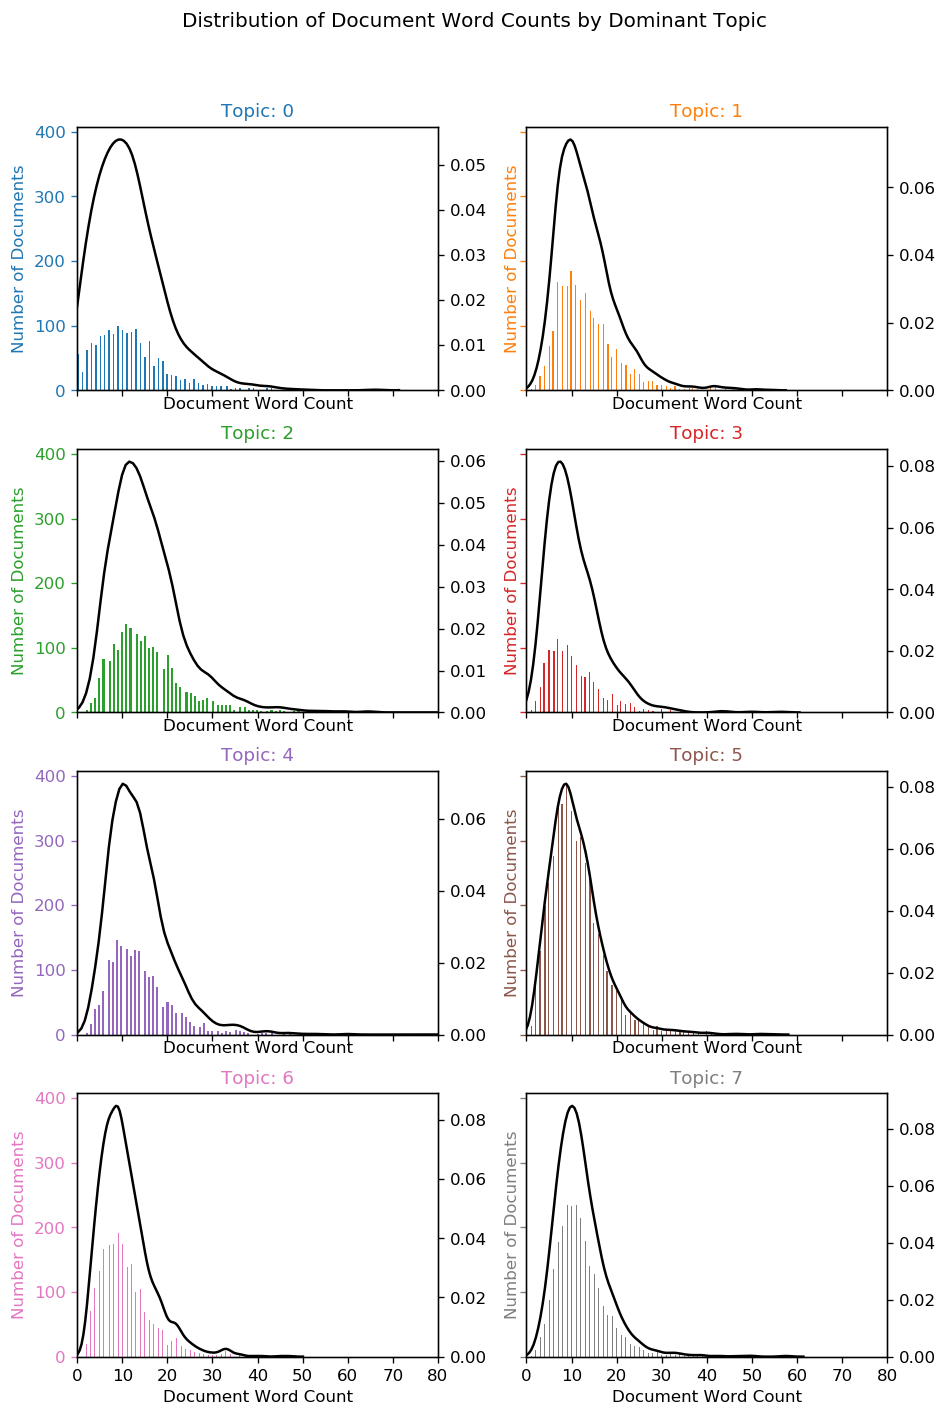

In [37]:
import numpy as np
import matplotlib.colors as mcolors # up to 10 colors: 'mcolors.TABLEAU_COLORS'
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(4,2,figsize=(8,12), dpi=120, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 200, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 80), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=11, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,80,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=12)
plt.show()

### Wordcloud of Top 10 words in each topic
size of the words is proportional to the weight

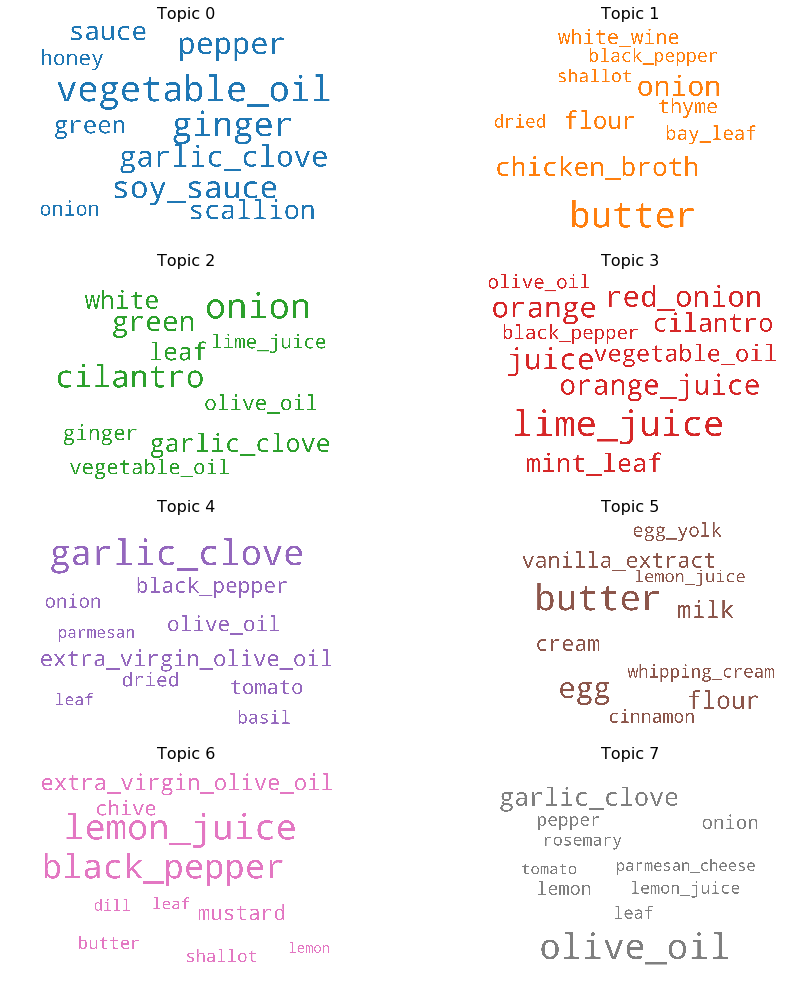

In [38]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = optimal_model.show_topics(num_topics=8, formatted=False)

fig, axes = plt.subplots(4, 2, figsize=(14,14), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Word Counts of Topic Keywords
weights = the importance of the keywords in the topic <br>
word count = how frequently the words have appeared in the recipes

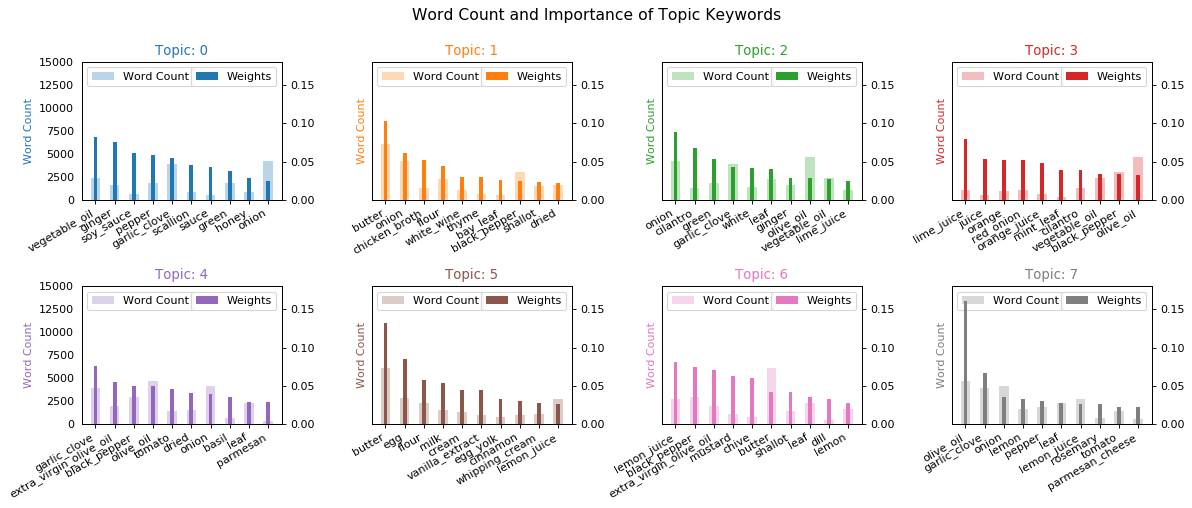

In [39]:
from collections import Counter
topics = optimal_model.show_topics(num_topics=8, formatted=False)
data_flat = [w for w_list in data_words_trigrams for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 4, figsize=(15,6), sharey=True, dpi=80)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.18); ax.set_ylim(0, 15000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=12)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=0.3)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=14, y=1.05)    
plt.show()

In [41]:
import pandas as pd
import numpy as np

data = pd.read_csv('recipes_topic_mixture.csv')
data = data.fillna(0)

# Create Dictionary of corresponding topics number and Names
labels_words = {"Unnamed: 0": "Index",
                0:"Asian Delights", 
               1:"Festive Season",
               2:"Rich & Flavourful", 
               3:"Summertime",
               4:"Italian",
               5:"Cakes & Desserts",
               6:"Light Bites",
               7:"Western",
               }
data.columns = labels_words.values()

In [42]:
sample = None
total_list = []
for i, row in data.iterrows():
    sample = row.drop(labels=["Index"])
    sample = sample.sort_values(ascending=False)
    test = max(sample) 
    if  test > 0.7:
        temp = [sample.index[0]]
    elif test > 0.4:
        temp = list(sample.index[0:2])
    else:
        temp = list(sample.index[0:3])
    total_list.append(temp)

In [43]:
new_col = pd.Series(total_list)
data['Topic'] = new_col
data

,Index,Asian Delights,Festive Season,Rich & Flavourful,Summertime,Italian,Cakes & Desserts,Light Bites,Western,Classification
0,0,0.021,0.021,0.021,0.021,0.854,0.021,0.021,0.021,[Italian]
1,1,0.000,0.774,0.000,0.000,0.000,0.000,0.000,0.188,[Festive Season]
2,2,0.016,0.648,0.016,0.016,0.259,0.016,0.016,0.016,"[Festive Season, Italian]"
3,3,0.011,0.011,0.011,0.177,0.755,0.011,0.011,0.011,[Italian]
4,4,0.042,0.042,0.042,0.042,0.042,0.708,0.042,0.042,[Cakes & Desserts]
5,5,0.018,0.018,0.187,0.018,0.705,0.018,0.018,0.018,[Italian]
6,6,0.063,0.063,0.063,0.063,0.063,0.063,0.562,0.063,"[Light Bites, Festive Season]"
7,7,0.031,0.031,0.282,0.031,0.031,0.531,0.031,0.031,"[Cakes & Desserts, Rich & Flavourful]"
8,8,0.933,0.000,0.000,0.000,0.000,0.000,0.000,0.000,[Asian Delights]
9,9,0.013,0.013,0.013,0.013,0.013,0.013,0.912,0.013,[Light Bites]


In [46]:
Assigned_labels = pd.concat([recipes_final, data], axis=1)
Assigned_labels = pd.DataFrame(Assigned_labels).drop(columns='Index')
Assigned_labels

,calories,categories,date,desc,directions,fat,ingredients,protein,rating,sodium,title,Asian Delights,Festive Season,Rich & Flavourful,Summertime,Italian,Cakes & Desserts,Light Bites,Western,Classification
0,426.000,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",2006-09-01 04:00:00.000,None,"[1. Place the stock, lentils, celery, carrot, ...",7.000,"[4 cups low-sodium vegetable or chicken stock,...",30.000,2.500,559.000,"Lentil, Apple, and Turkey Wrap",0.021,0.021,0.021,0.021,0.854,0.021,0.021,0.021,[Italian]
1,403.000,"[Food Processor, Onion, Pork, Bake, Bastille D...",2004-08-20 04:00:00.000,This uses the same ingredients found in boudin...,[Combine first 9 ingredients in heavy medium s...,23.000,"[1 1/2 cups whipping cream, 2 medium onions, c...",18.000,4.375,1439.000,Boudin Blanc Terrine with Red Onion Confit,0.000,0.774,0.000,0.000,0.000,0.000,0.000,0.188,[Festive Season]
2,165.000,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",2004-08-20 04:00:00.000,None,[In a large heavy saucepan cook diced fennel a...,7.000,"[1 fennel bulb (sometimes called anise), stalk...",6.000,3.750,165.000,Potato and Fennel Soup Hodge,0.016,0.648,0.016,0.016,0.259,0.016,0.016,0.016,"[Festive Season, Italian]"
3,nan,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",2009-03-27 04:00:00.000,The Sicilian-style tomato sauce has tons of Me...,[Heat oil in heavy large skillet over medium-h...,nan,"[2 tablespoons extra-virgin olive oil, 1 cup c...",nan,5.000,nan,Mahi-Mahi in Tomato Olive Sauce,0.011,0.011,0.011,0.177,0.755,0.011,0.011,0.011,[Italian]
4,547.000,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",2004-08-20 04:00:00.000,None,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.000,"[1 12-ounce package frozen spinach soufflé, th...",20.000,3.125,452.000,Spinach Noodle Casserole,0.042,0.042,0.042,0.042,0.042,0.708,0.042,0.042,[Cakes & Desserts]
5,948.000,"[Sandwich, Food Processor, Tomato, Kid-Friendl...",2004-08-20 04:00:00.000,This recipe can be prepared in 45 minutes or l...,"[Mix basil, mayonnaise and butter in processor...",79.000,[2 1/2 cups (lightly packed) fresh basil leave...,19.000,4.375,1042.000,The Best Blts,0.018,0.018,0.187,0.018,0.705,0.018,0.018,0.018,[Italian]
6,nan,"[Salad, Potato, Side, Easter, Low Fat, Quick &...",2004-08-20 04:00:00.000,Serve this newfangled main-course salad with a...,[Cook potatoes and carrots in large pot of boi...,nan,"[1 1/2 pounds small red-skinned potatoes, each...",nan,4.375,nan,Ham and Spring Vegetable Salad with Shallot Vi...,0.063,0.063,0.063,0.063,0.063,0.063,0.562,0.063,"[Light Bites, Festive Season]"
7,nan,"[Egg, Fruit, No-Cook, Cocktail Party, Vegetari...",2004-08-20 04:00:00.000,Pop one of these in your mouth for a burst of ...,[Stir together sugar and chili powder. Whisk e...,nan,"[6 tablespoons granulated sugar, 1 1/2 tablesp...",nan,3.750,nan,Spicy-Sweet Kumquats,0.031,0.031,0.282,0.031,0.031,0.531,0.031,0.031,"[Cakes & Desserts, Rich & Flavourful]"
8,170.000,"[Beef, Ginger, Sauté, Stir-Fry, Quick & Easy, ...",2004-08-20 04:00:00.000,Bulgogi,"[Stir together soy sauce, sugar, sesame oil, w...",10.000,"[1/4 cup soy sauce, 1 tablespoon sugar, 2 teas...",7.000,4.375,1272.000,Korean Marinated Beef,0.933,0.000,0.000,0.000,0.000,0.000,0.000,0.000,[Asian Delights]
9,602.000,"[Salad, Mustard, Potato, Picnic, Lunch, Mayonn...",2008-10-23 22:24:26.000,Transform your picnic into un pique-nique to r...,[Chop enough parsley leaves to measure 1 table...,41.000,"[6 long parsley sprigs, divided, 1 3/4 cups re...",23.000,3.750,1696.000,Ham Persillade with Mustard Potato Salad and M...,0.013,0.013,0.013,0.013,0.013,0.013,0.912,0.013,[Light Bites]


In [47]:
pd.DataFrame(Assigned_labels).to_csv("Assigned_labels.csv")